# Logistic Regression On Heart Disease Dataset

# Import the basic library

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_column",30)

In [8]:
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Checking the null values

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Descriptive statistics

In [16]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [20]:
X=df.drop("target",axis=1)
Y=df["target"]

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [23]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


<Axes: >

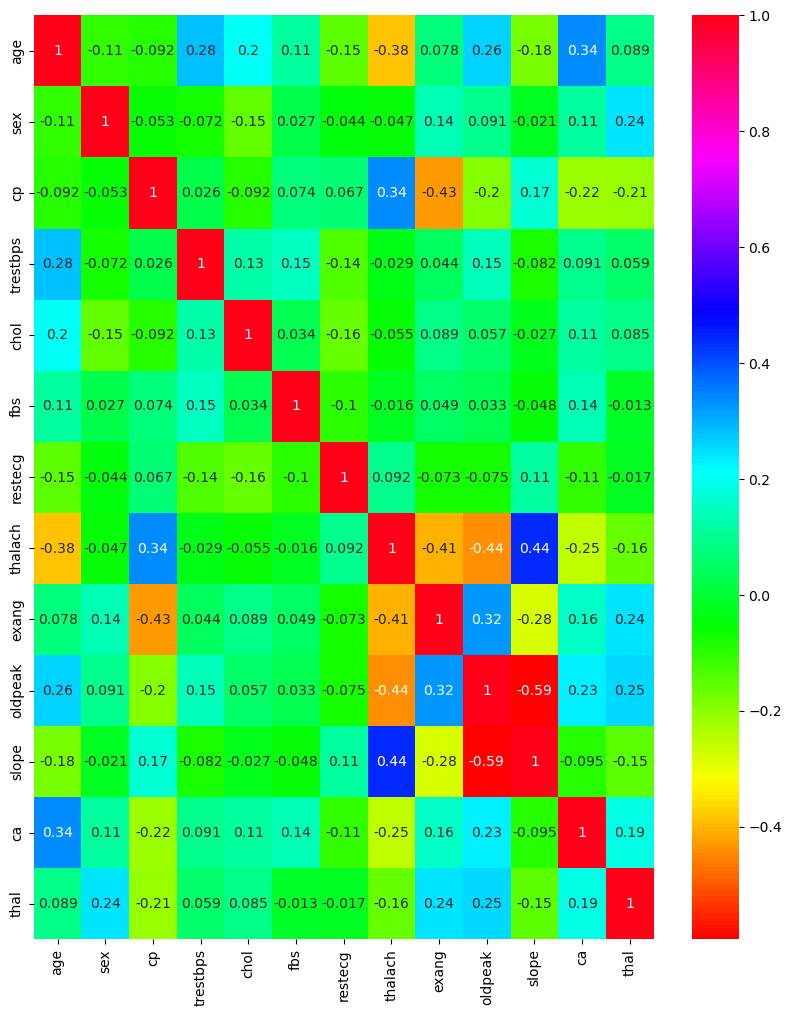

In [24]:
plt.figure(figsize=(10,12))
sns.heatmap(X_scaled.corr(method='spearman'),annot=True,cmap='hsv')

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3)


In [26]:
X_train.shape

(717, 13)

# Importing the logistic regression model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

# Training the model

In [29]:
model.fit(X_train,Y_train)

LogisticRegression()

# Checking the performance


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Checking the training performance

In [33]:
Y_train_predict=model.predict(X_train)

In [34]:
accuracy_score(Y_train,Y_train_predict)


0.8549511854951185

In [35]:
model.score(X_train,Y_train)

0.8549511854951185

In [36]:
confusion_matrix(Y_train,Y_train_predict)

array([[289,  68],
       [ 36, 324]], dtype=int64)

In [37]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       357
           1       0.83      0.90      0.86       360

    accuracy                           0.85       717
   macro avg       0.86      0.85      0.85       717
weighted avg       0.86      0.85      0.85       717



# Checking the performance for testing data

In [38]:
Y_predict_test=model.predict(X_test)

In [39]:
accuracy_score(Y_test,Y_predict_test)

0.8246753246753247

In [40]:
confusion_matrix(Y_test,Y_predict_test)

array([[108,  34],
       [ 20, 146]], dtype=int64)

In [41]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       142
           1       0.81      0.88      0.84       166

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308



In [42]:
Y_test

840    0
160    0
885    0
223    1
364    0
      ..
496    0
638    0
415    1
85     1
838    1
Name: target, Length: 308, dtype: int64

In [43]:
Y_predict_test

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,

In [44]:
Y_train

950    0
378    0
159    1
949    1
565    1
      ..
298    1
101    1
601    0
678    1
583    0
Name: target, Length: 717, dtype: int64

In [45]:
Y_train_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,

# Checking the propability score for both the classes.


In [46]:
probability_score=model.predict_proba(X_test)
probability_score

array([[0.97057394, 0.02942606],
       [0.94326897, 0.05673103],
       [0.98603773, 0.01396227],
       [0.00617911, 0.99382089],
       [0.14811034, 0.85188966],
       [0.05133735, 0.94866265],
       [0.39785223, 0.60214777],
       [0.46813583, 0.53186417],
       [0.84782139, 0.15217861],
       [0.9877341 , 0.0122659 ],
       [0.32227759, 0.67772241],
       [0.90495159, 0.09504841],
       [0.30356248, 0.69643752],
       [0.75133948, 0.24866052],
       [0.97158102, 0.02841898],
       [0.266991  , 0.733009  ],
       [0.20474216, 0.79525784],
       [0.32801049, 0.67198951],
       [0.54336725, 0.45663275],
       [0.31291101, 0.68708899],
       [0.40997011, 0.59002989],
       [0.04686857, 0.95313143],
       [0.33466927, 0.66533073],
       [0.17914793, 0.82085207],
       [0.97690429, 0.02309571],
       [0.97690429, 0.02309571],
       [0.98323543, 0.01676457],
       [0.88508727, 0.11491273],
       [0.04942968, 0.95057032],
       [0.01500099, 0.98499901],
       [0.

In [47]:
probability_score1=model.predict_proba(X_train)
probability_score1

array([[0.99396845, 0.00603155],
       [0.78755787, 0.21244213],
       [0.06432089, 0.93567911],
       ...,
       [0.98342382, 0.01657618],
       [0.04942968, 0.95057032],
       [0.93881543, 0.06118457]])

In [48]:
X_test_new=X_test.copy()

In [49]:
X_test_new["Y_predicted"]=Y_predict_test

In [50]:
X_test_new["Actual_Y"]=Y_test

In [51]:
pd.set_option("display.max_rows",100)

In [53]:
X_test_new.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Y_predicted,Actual_Y
840,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0,0
160,1.000000,1.0,0.000000,0.292453,0.406393,0.0,0.0,0.694656,1.0,0.000000,1.0,0.75,0.666667,0,0
885,0.583333,1.0,0.000000,0.669811,0.372146,1.0,0.0,0.404580,0.0,0.161290,0.5,0.75,1.000000,0,0
223,0.208333,0.0,0.666667,0.000000,0.166667,0.0,0.5,0.824427,0.0,0.000000,1.0,0.00,0.666667,1,1
364,0.583333,0.0,0.333333,0.339623,0.251142,0.0,0.0,0.786260,0.0,0.000000,0.5,0.25,0.666667,1,0
568,0.520833,0.0,0.666667,0.622642,0.171233,0.0,0.5,0.702290,0.0,0.000000,1.0,0.25,0.666667,1,1
784,0.520833,1.0,0.666667,0.528302,0.242009,0.0,0.0,0.717557,0.0,0.258065,1.0,0.00,1.000000,1,1
409,0.354167,1.0,0.666667,0.528302,0.239726,0.0,0.5,0.580153,0.0,0.580645,0.5,0.00,0.666667,1,0
361,0.687500,1.0,0.666667,0.339623,0.239726,0.0,0.5,0.572519,0.0,0.290323,0.5,0.75,1.000000,0,1
993,0.291667,1.0,0.000000,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,0.5,1.00,1.000000,0,0


# Thanks for going through my work
